# Análise de Frequência

In [1]:
def analise_frequencia(texto):
    letras = {}
    # Verifica cada caractere do texto individualmente.
    for c in texto:
        # Verifica se o caractere é uma letra, ignorando números e caracteres especiais.
        if((c >= 'a' and c<='z') or (c >= 'A' and c<= 'Z') ):
            c = c.lower()
            # Conta as ocorrências.
            if(letras.get(c) != None):
                letras[c] +=1
            else:
                letras[c] = 1
    return letras

def ordena_ocorrencia(letras):
    # Retorna ordenado de maior ocorrências para menor.
    return sorted(letras.items(), key=lambda x:x[1], reverse=True)

In [2]:
frase = "Vamos aprender sobre criptografia hoje no Tech Day"

In [3]:
print(ordena_ocorrencia(analise_frequencia(frase)))

[('a', 5), ('o', 5), ('r', 5), ('e', 5), ('s', 2), ('p', 2), ('n', 2), ('d', 2), ('c', 2), ('i', 2), ('t', 2), ('h', 2), ('v', 1), ('m', 1), ('b', 1), ('g', 1), ('f', 1), ('j', 1), ('y', 1)]


In [4]:
def txt_para_string(arquivo):
    with open(arquivo, 'r', encoding='utf-8') as file:
        content = file.read()
    return content

In [5]:
olavo_bilac = analise_frequencia(txt_para_string('../referencia/via_lactea_olavo_bilac.txt'))
print(ordena_ocorrencia(olavo_bilac))

[('a', 1902), ('e', 1856), ('o', 1604), ('s', 1255), ('r', 916), ('i', 734), ('n', 719), ('d', 695), ('u', 688), ('t', 654), ('m', 637), ('l', 431), ('c', 403), ('p', 336), ('v', 280), ('q', 192), ('h', 185), ('b', 155), ('g', 148), ('f', 147), ('z', 71), ('j', 50), ('x', 22), ('w', 4)]


In [6]:
machado_assis = analise_frequencia(txt_para_string('../referencia/a_carteira_machado_de_assis.txt'))
print(ordena_ocorrencia(machado_assis))

[('a', 861), ('e', 672), ('o', 606), ('s', 391), ('r', 384), ('i', 379), ('n', 301), ('u', 301), ('d', 278), ('t', 257), ('m', 229), ('c', 209), ('l', 175), ('p', 154), ('h', 121), ('v', 97), ('g', 82), ('q', 58), ('b', 51), ('f', 49), ('z', 18), ('j', 16), ('x', 8), ('w', 4)]


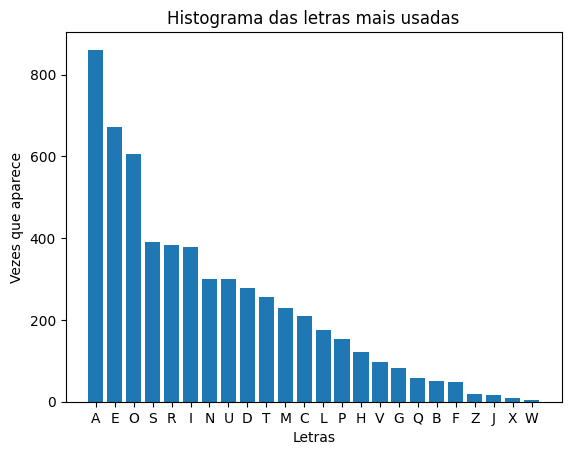

In [7]:
import matplotlib.pyplot as plt

def plot_histogram(dictionary):
    sorted_items = sorted(dictionary.items(), key=lambda item: item[1], reverse=True)
    keys = [item[0].upper() for item in sorted_items]
    values = [item[1] for item in sorted_items]

    plt.bar(keys, values)
    plt.xlabel('Letras')
    plt.ylabel('Vezes que aparece')
    plt.title('Histograma das letras mais usadas')
    plt.show()

# Vamos combinar as duas análises em um único dicionário.
frequencia_pt_br = olavo_bilac | machado_assis
# E plotar em um gráfico o número de ocorrências.
plot_histogram(frequencia_pt_br)

In [8]:
# Escolhendo uma chave aleatória.
import random
chave = random.randint(1, 25)

# Encriptando com a Cifra de César na mensagem.
from helper_functions import *
mensagem_encriptada = cesar_encrypt(frase, chave)

# Analisando a frequência de letras na mensagem encriptada.
frequencia_mensagem = analise_frequencia(mensagem_encriptada)

# Comparando as letras mais comuns da mensagem encriptada com as da lingua portuguesa.
maior_ocorrencia_mensagem = ordena_ocorrencia(frequencia_mensagem)[0][0]
maior_ocorrencia_pt_br = ordena_ocorrencia(frequencia_pt_br)[0][0]

# Calcula a distância entre elas.
distancia = abs( ord(maior_ocorrencia_mensagem) - ord(maior_ocorrencia_pt_br) )

print("A chave aleatória: ", chave)
print("Mensagem Original: ", frase)
print("Mensagem Encriptada: ", mensagem_encriptada)
print("Maior ocorrência na mensagem encriptada: ", maior_ocorrencia_mensagem)
print("A distância calculada: ", distancia)
print("A mensagem decriptada: ", cesar_decrypt(mensagem_encriptada, distancia))

A chave aleatória:  23
Mensagem Original:  Vamos aprender sobre criptografia hoje no Tech Day
Mensagem Encriptada:  Sxjlp xmobkabo plyob zofmqldoxcfx elgb kl Qbze Axv
Maior ocorrência na mensagem encriptada:  x
A distância calculada:  23
A mensagem decriptada:  Vamos aprender sobre criptografia hoje no Tech Day
